# Importing necessary libraries  
In this cell, we import the required Python libraries:
- `numpy`, `pandas` for numerical and data manipulation.
- `matplotlib.pyplot` and `seaborn` for visualization.
- `sklearn` modules for preprocessing, model training, and evaluation.



In [1]:
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8


# Loading and Exploring the Dataset  
We load the DMV Written Test dataset using `pandas.read_csv()`.  
The dataset information (`.info()`) and the first few rows (`.head()`) are displayed to understand its structure.


In [3]:
data = pd.read_csv("DMV_Written_Tests.csv")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


# Extracting Features and Target Variable  
- `X` contains the scores from two DMV tests.  
- `y` is the binary target variable (0 = failed, 1 = passed).


In [5]:
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data['Results'].values

## Data Visualization of DMV Test Scores

The following code generates a scatter plot to visualize the DMV written test scores of candidates. The dataset is categorized into two groups: those who passed and those who failed.

- **Green Triangles (▲):** Represent candidates who passed the test.
- **Red Crosses (✖):** Represent candidates who failed the test.

The x-axis represents the scores from the first written test, while the y-axis represents the scores from the second written test.



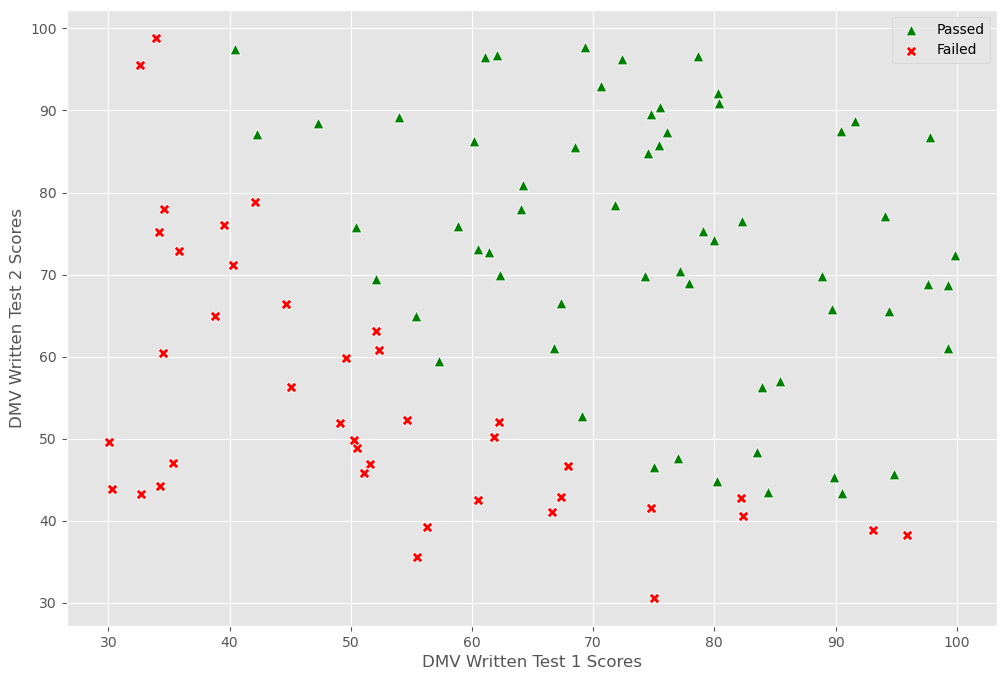

In [6]:
passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)

ax = sns.scatterplot(
    x=scores[passed[:, 0], 0],
    y=scores[passed[:, 0], 1],
    marker="^",
    color='green',
    s=60
)

sns.scatterplot(
    x=scores[failed[:, 0], 0],
    y=scores[failed[:, 0], 1],
    marker="X",
    color='red',
    s=60
)

ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(['Passed', 'Failed'])
plt.show()

# Implementing the Sigmoid Function  
The sigmoid function maps input values to a probability between 0 and 1.  
This function is crucial for logistic regression.


In [7]:
def logistic_function(x):
    return 1/(1 + np.exp(-x))

In [8]:
logistic_function(0)

0.5

## Implementing the Cost Function  

The cost function, also known as **Log Loss**, measures how well the logistic regression model fits the data.  
A lower cost value indicates a better fit.

### Key Points:
- The function computes the cost using the **logarithmic loss formula**.
- It also calculates the **gradient**, which is used to update the model parameters during gradient descent.
- Both the cost and the gradient are returned as outputs.

This ensures that the function can be directly used in **gradient descent** optimization.



In [9]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient

## Data Preprocessing and Cost Initialization

This code normalizes the feature set, adds a bias term, and initializes parameters for logistic regression.

### Steps:
1. Normalize features using mean and standard deviation.
2. Append a column of ones for the bias term.
3. Reshape the target variable for matrix operations.
4. Initialize `theta` to zeros.
5. Compute the initial cost and gradient.



In [10]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1)
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


## Training Logistic Regression Model Using Gradient Descent

This code implements **batch gradient descent** to optimize the parameters (`theta`) for logistic regression.

### Steps:
1. **Define Gradient Descent Function (`gradient_descent`)**:
   - Iteratively updates `theta` using the gradient of the cost function.
   - Stores cost values at each iteration for analysis.

2. **Initialize and Run Gradient Descent**:
   - Learning rate (`alpha`) = **1**  
   - Number of iterations = **200**  
   - Initial parameters (`theta_init`) are set to zeros.

3. **Print the Final Parameters and Cost**:
   - Displays the optimized `theta` values.
   - Prints the cost after training.



In [11]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [12]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)

In [13]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost: 0.20489382035120143


## Cost Function Convergence Plot

This section visualizes the convergence of the cost function over iterations of **batch gradient descent**.

### Key Points:
- The **x-axis** represents the number of iterations.
- The **y-axis** represents the cost function \( J(\Theta) \), indicating the model’s error.
- The cost function should decrease over time, showing convergence.
- The plot is saved as `"cost_function_over_iterations.png"`.




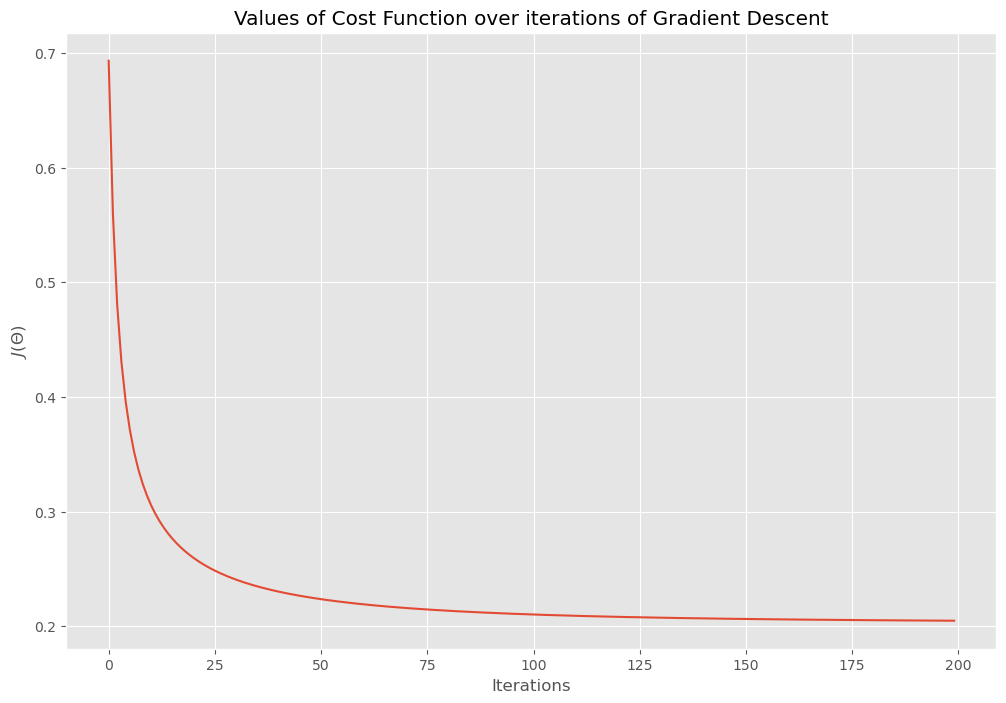

In [14]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");
plt.grid(True)
plt.savefig("cost_function_over_iterations.png")
plt.show()

## Decision Boundary Visualization

This section plots the decision boundary for logistic regression, separating the two classes (passed vs. failed) based on the trained model.

### Steps:
1. **Scatter Plot of Data Points:**
   - Green **triangles (▲)** represent candidates who **passed**.
   - Red **crosses (✖)** represent candidates who **failed**.

2. **Plot the Decision Boundary:**
   - A **blue line** represents the decision boundary, separating the two classes.




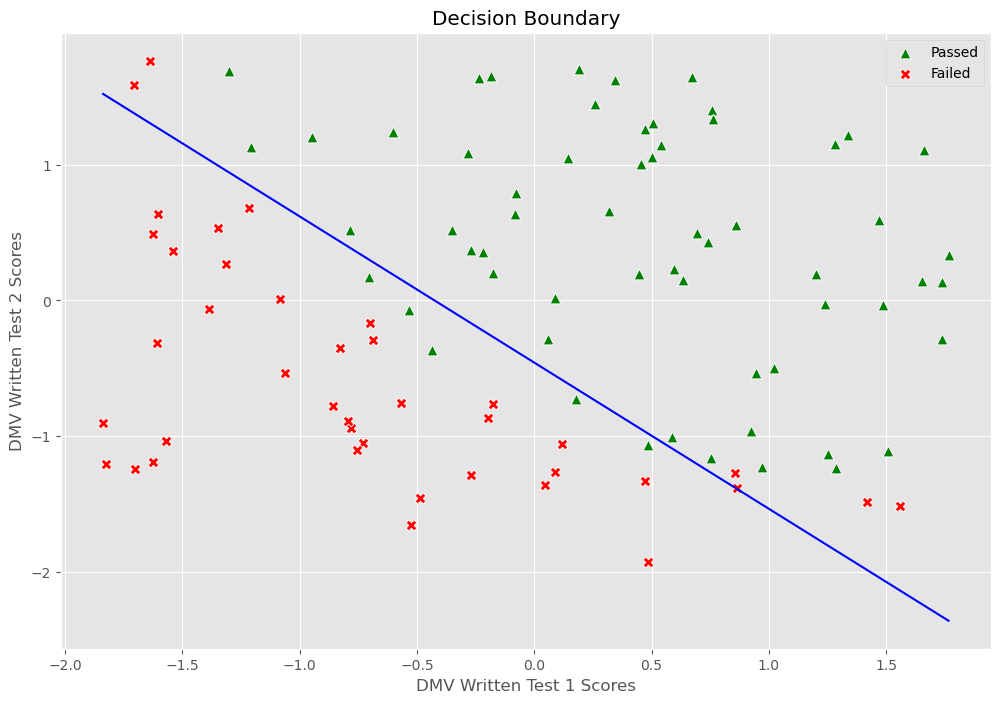

In [15]:
ax = sns.scatterplot(x=X[passed[:, 0], 1],
                        y=X[passed[:, 0], 2],
                        marker="^",
                        color='green',
                        s=60)
sns.scatterplot(x=X[failed[:, 0], 1],
                y=X[failed[:, 0], 2],
                marker="X",
                color='red',
                s=60)
ax.legend(['Passed', 'Failed'])
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = - (theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x=x_boundary, y=y_boundary, color="blue")
plt.title("Decision Boundary")
plt.xlabel("DMV Written Test 1 Scores")
plt.ylabel("DMV Written Test 2 Scores")
plt.show()

## Predictions using the optimized $\theta$ values

This section evaluates the trained logistic regression model by computing **accuracy on the training data** and making a prediction for a **single test case**, manually provided




In [16]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0

In [17]:
p = predict(theta, X)
print("Training Accuracy:", sum(p == y)[0], "%")

Training Accuracy: 89 %


In [18]:
test = np.array([50, 79])
test = (test - mean_scores) / std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[0], 2), "probability of passing.")

A person who scores 50 and 79 on their DMV written tests have a 0.71 probability of passing.
